##Exploratory Data Analysis (EDA) for categorical problem


Performing exploratory analysis to extract meaningful insight from the data and identify the best features to be used for modeling.
####1.Data pre-processing
- Assumptions about data shape
- Missing values
- Data types
- Categorical variables
- Outliers or errors
- Feature Engineering/Creating features

####2 .EDA
Performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.
- Statistical Summary
- EDA Univariate Analysis
- EDA Bivariate Analysis
- EDA Multivariate Analysis
- Conclusion

In [ ]:
#1.import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

##1.  Data Shape

Examining the shape of the datato be able to know the  extent of the available information and its dimensionality.This will enbale us to gauge the dataset's size, assess its complexity, and plan appropriate analyses or data processing steps accordingly

In [ ]:
#load the data set
syriaTel_customer = pd.read_csv('/content/syriaTel_customer.csv')
#date shape
data_shape = syriaTel_customer.shape
print("Shape of the dataset:", data_shape)


Shape of the dataset: (3333, 21)


####Column Names and descriptions
**state**, *string* : 2-letter code of the US state of customer residence

**account_length**, *numerical*:  Number of months the customer has been with the current telco provider.

**area_code**, *string* : "area_code_AAA" where AAA = 3-digit area code.

**phone_number**, *string* : Customer Phone Number

**international_plan**, *(yes/no)* : The customer has international plan.

**voice_mail_plan**, *(yes/no)* : The customer has voice mail plan.

**number_vmail_messages**, *numerical* : Number of voice-mail messages.

**total_day_minutes**, *numerical* : Total minutes of day calls.

**total_day_calls**, *numerical* :  Total number of day calls.

**total_day_charge** *numerical* : Total charge of day calls.

**total_eve_minutes** *numerical* : Total minutes of evening calls

**total_eve_calls**, *numerical* : Total number of evening calls.

**total_eve_charge**, *numerical* Total charge of evening calls.

**total_night_minutes**, *numerical* : Total minutes of night calls.

**total_night_calls**, *numerical* : Total number of night calls.

**total_night_charge**, *numerical* : Total charge of night calls.

**total_intl_minutes**, *numerical* : Total minutes of international calls.

**total_intl_calls**, *numerical* : Total number of international calls.

**total_intl_charge**, *numerical* : Total charge of international calls

**number_customer_service_calls** *numerical* : Number of calls to customer service

**churn**, *(yes/no)*: Customer churn - target variable.

In [ ]:
#to preview the 1st 5 rows
syriaTel_customer.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#to preview the last 5 rows
syriaTel_customer.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
#syriaTel_customerphone = syriaTel_customer['phone number']

In [ ]:
# More information about the data
syriaTel_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

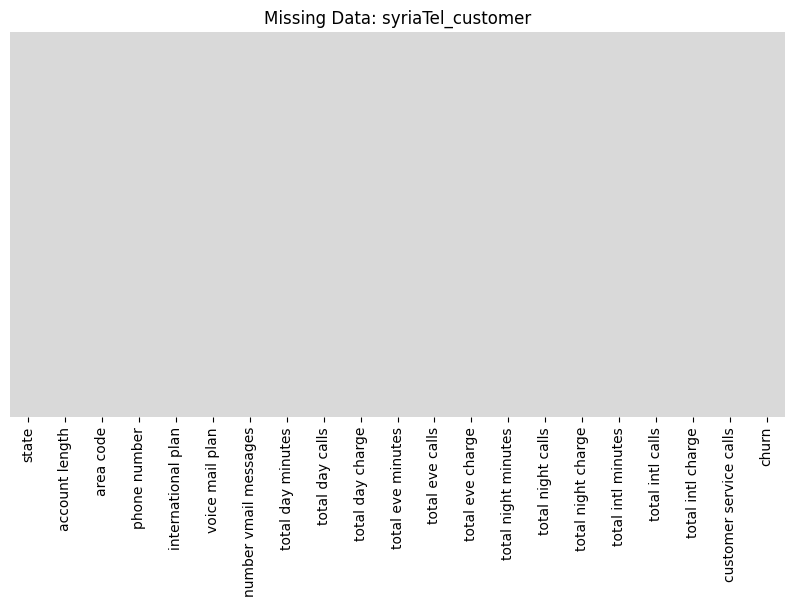

In [ ]:
#Missing values
#from the code above, it appears that there are no missing values. Below is a code for an overview of the same
# Heatmap
sns.heatmap(syriaTel_customer.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: syriaTel_customer')
plt.show()

- Since the figure shows a uniform colour, it means there are no missing values

#Data Types
We need to confirm that the variables are being assigned the correct data type to allow for easier analysis later on.

In [ ]:
# Identify non-null objects
print('\n')
print('Non-Null Objects to Be Converted to Category')
print(syriaTel_customer.select_dtypes(['object']).columns)



Non-Null Objects to Be Converted to Category
Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


In [ ]:
#We will drop the Phone number column as it does not help in better undertanding the data
#Remove the Phone number
# Remove Phone feature
#syriaTel_customer.drop('phone number', axis = 1, inplace = True)

In [ ]:
#syriaTel_customer.head()

In [ ]:
# Convert objects to category data type
syriaTel_cat = ['state','international plan','voice mail plan']

for colname in syriaTel_cat:
    syriaTel_customer[colname] = syriaTel_customer[colname].astype('category')

In [ ]:
#We will now use the phone number column to check if there are any duplicate customers
# Check for duplicates based on Phone number column
duplicates = syriaTel_customer.duplicated(subset=['phone number'])

duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

Identifying Outliers

In [ ]:
#Change of column name "account lengh"
syriaTel_customer= syriaTel_customer.rename(columns={'account length': 'Subscription Period'})
syriaTel_customer.head()

,state,Subscription Period,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Checking for outliers on the columns'Subscription Period' and "Customer Service Calls" using the z-score method
syriaTel_Outliers1 = syriaTel_customer['Subscription Period']

# Calculate Z-score
z_scores = np.abs((syriaTel_Outliers1 - syriaTel_Outliers1.mean()) / syriaTel_Outliers1.std())

# To define threshold for outliers
threshold = 3

# Find outliers
outliers1 = syriaTel_Outliers1[z_scores > threshold]

print("Outliers1:")
print(outliers1)


Outliers1:
416     224
817     243
1408    232
1551    225
1751    225
1886    224
3216    221
Name: Subscription Period, dtype: int64


In [ ]:
#To find the relationship between the outliers and the Target Variable
#1. The correlation between subscription period and churning with and without outliers

#to get the count of churns for data with outliers
target_counts = syriaTel_customer['churn'].value_counts()

print("Count of 'True' and 'False' values in the churn:")
print(target_counts)


Count of 'True' and 'False' values in the churn:
False    2850
True      483
Name: churn, dtype: int64


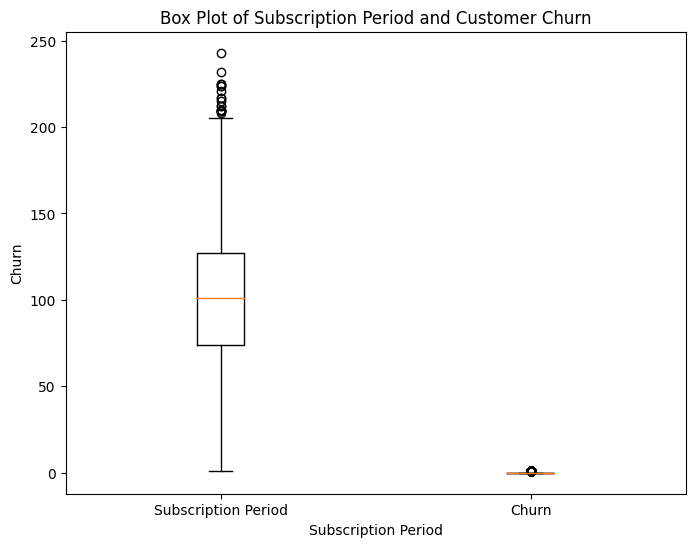

In [ ]:
plt.figure(figsize=(8, 6))
#plt.boxplot([syriaTel_customer['Subscription Period'], syriaTel_customer['churn']], labels=['Subscription Period', 'churn'])
plt.boxplot([syriaTel_customer['Subscription Period'], syriaTel_customer['churn'].astype(int)], labels=['Subscription Period', 'Churn'])
plt.title('Box Plot of Subscription Period and Customer Churn')
#labels=['Subscription Period', 'Churn']
plt.xlabel('Subscription Period')
plt.ylabel('Churn')
plt.show()

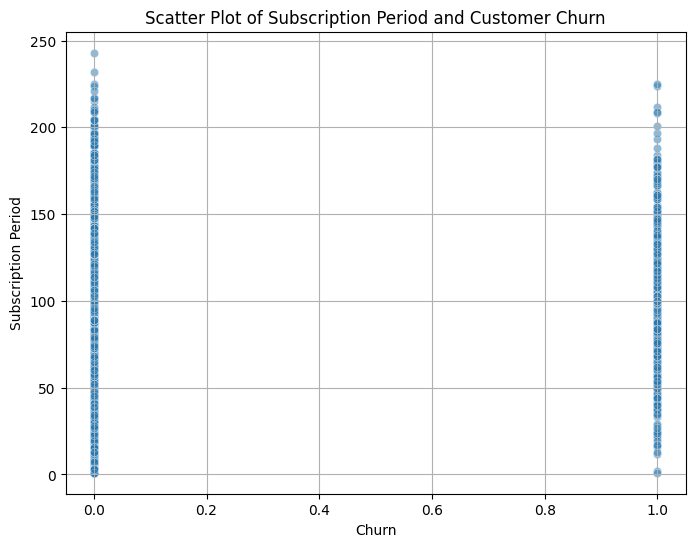

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=syriaTel_customer, x='churn', y='Subscription Period', alpha=0.5)
plt.title('Scatter Plot of Subscription Period and Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Subscription Period')
plt.grid(True)
plt.show()



In [ ]:
#to get the count of churns for data without outliers
#Drop outliers
syriaTel_nooutliers1 = syriaTel_customer[z_scores <= threshold]
syriaTel_nooutliers1
#outliers1 = syriaTel_Outliers1[z_scores > threshold]
#no_outliers1 = outliers1[z_scores <= threshold]
target_counts1 = syriaTel_nooutliers1['churn'].value_counts()

print("Count of 'True' and 'False' values in the churn:")
print(target_counts1)

Count of 'True' and 'False' values in the churn:
False    2845
True      481
Name: churn, dtype: int64


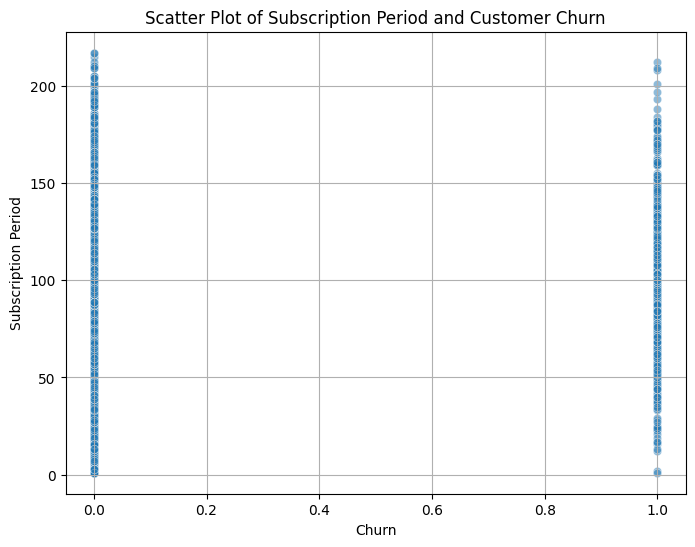

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=syriaTel_nooutliers1, x='churn', y='Subscription Period', alpha=0.5)
plt.title('Scatter Plot of Subscription Period and Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Subscription Period')
plt.grid(True)
plt.show()

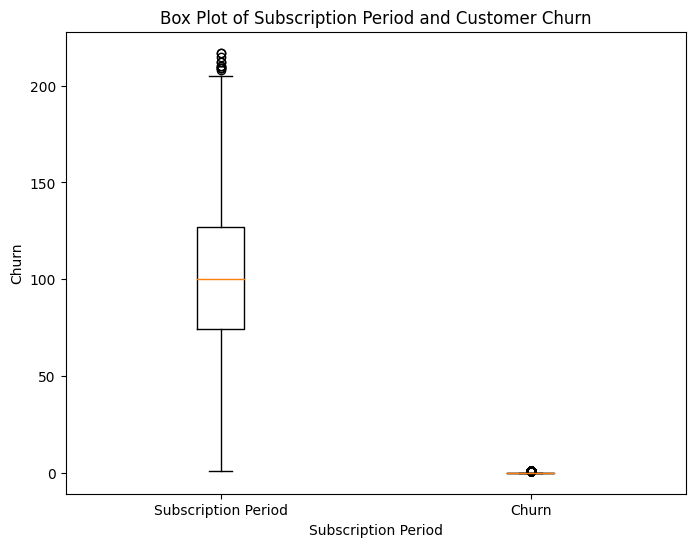

In [ ]:

plt.figure(figsize=(8, 6))
plt.boxplot([syriaTel_nooutliers1['Subscription Period'], syriaTel_nooutliers1['churn'].astype(int)], labels=['Subscription Period', 'Churn'])
plt.title('Box Plot of Subscription Period and Customer Churn')
#labels=['Subscription Period', 'Churn']
plt.xlabel('Subscription Period')
plt.ylabel('Churn')
plt.show()


####Conclusion on the Subscription period outliers
Based on subscription period outliers(7), it shows the customers with the highest subscription period. Out of these 7 customers only 2 churned. From the relationship established, dropping the outliers does not significatly alter the outlook of the data(model). However It would be important to retain the outliers since 71% of the customers with highest subscripton did not churn. They could give important insights on how to retain customers.

In [ ]:
# Checking for outliers on the column "Customer Service Calls" using the z-score method
syriaTel_Outliers2 = syriaTel_customer['customer service calls']

# Calculate Z-score
z_scores = np.abs((syriaTel_Outliers2 - syriaTel_Outliers2.mean()) / syriaTel_Outliers2.std())

# To define threshold for outliers
threshold = 3

# Find outliers
outliers2 = syriaTel_Outliers2[z_scores > threshold]

print("Outliers2:")
print(outliers2)

Outliers2:
332     7
522     7
542     9
694     6
721     6
778     6
902     7
908     6
974     6
1142    6
1273    6
1325    6
1407    6
1502    8
1638    6
1694    7
1831    7
1865    7
1912    8
1919    6
2223    6
2327    6
2380    9
2387    6
2428    6
2553    6
2786    6
2953    7
2958    6
2961    6
2979    7
3026    6
3081    6
3112    7
3190    6
Name: customer service calls, dtype: int64


In [ ]:
outliers2.info()

<class 'pandas.core.series.Series'>
Int64Index: 35 entries, 332 to 3190
Series name: customer service calls
Non-Null Count  Dtype
--------------  -----
35 non-null     int64
dtypes: int64(1)
memory usage: 560.0 bytes


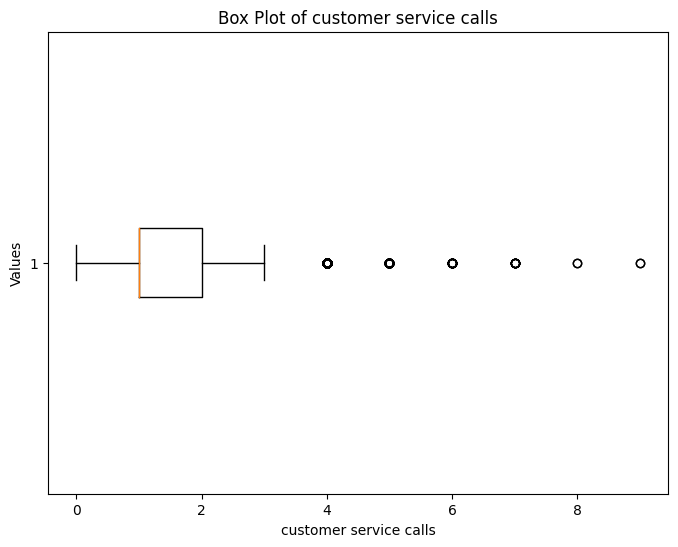

In [ ]:
# # Checking for outliers on the columns "customer service calls" using the box plots
#syriaTel_Outliers2 = syriaTel_customer['customer service calls']

# Creating a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(syriaTel_Outliers2, vert=False)
plt.title('Box Plot of ' + 'customer service calls')
plt.xlabel('customer service calls')
plt.ylabel('Values')
plt.show()


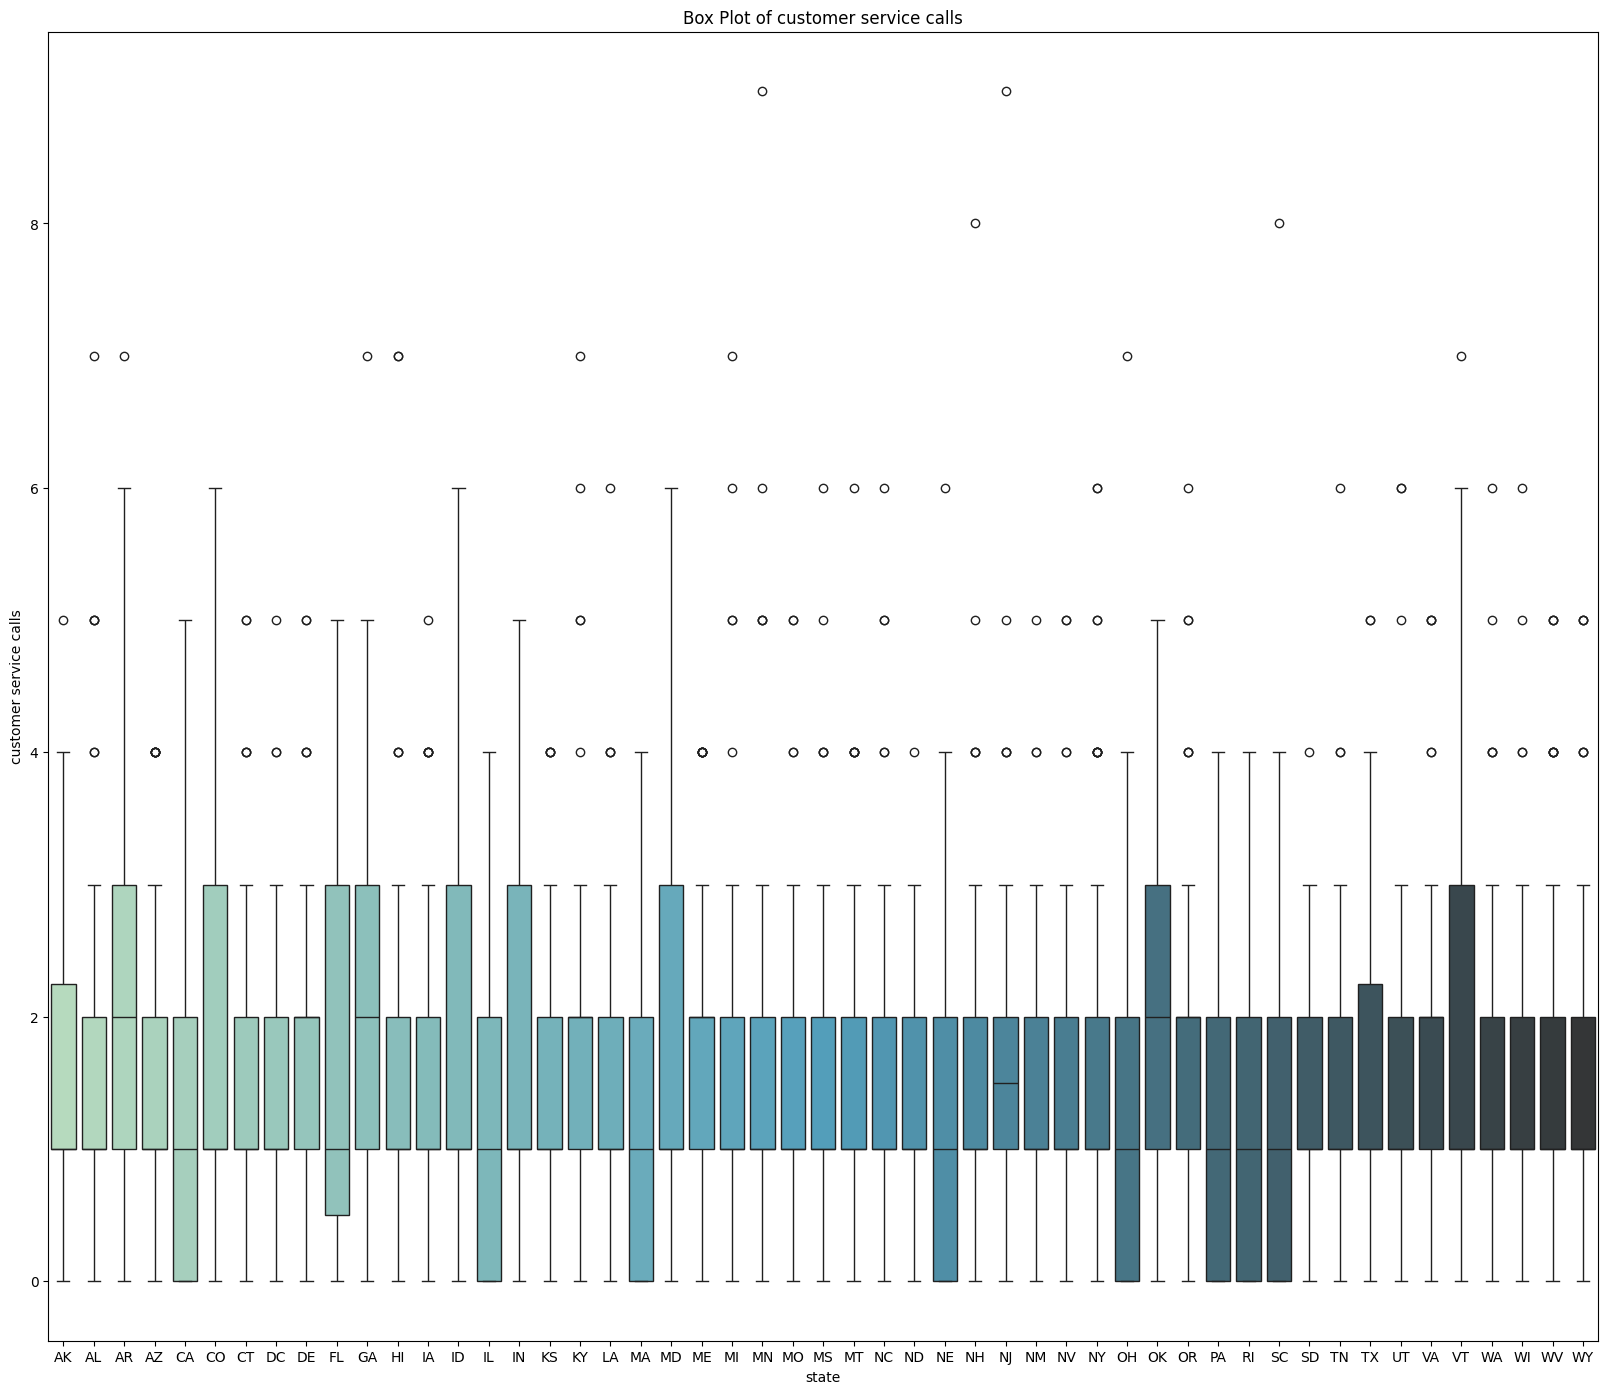

In [ ]:
plt.figure(figsize = (20,17))
sns.boxplot(x='state', y='customer service calls', data=syriaTel_customer, palette='GnBu_d').set_title('Box Plot of customer service calls')
plt.show()

In [ ]:
#to get the count of churns for data with outliers
target_counts2 = syriaTel_customer['churn'].value_counts()

print("Count of 'True' and 'False' values in the churn:")
print(target_counts)


Count of 'True' and 'False' values in the churn:
False    2850
True      483
Name: churn, dtype: int64


In [ ]:
#to get the count of churns for data without outliers
#Drop outliers
syriaTel_nooutliers2 = syriaTel_customer[z_scores <= threshold]
syriaTel_nooutliers2
#outliers1 = syriaTel_Outliers1[z_scores > threshold]
#no_outliers1 = outliers1[z_scores <= threshold]
target_counts2 = syriaTel_nooutliers2['churn'].value_counts()

print("Count of 'True' and 'False' values in the churn:")
print(target_counts2)

Count of 'True' and 'False' values in the churn:
False    2837
True      461
Name: churn, dtype: int64


In [ ]:
#ax = syriaTel_customer[['churn', 'Subscription Period']].astype(int).plot(kind='bar', figsize=(20, 16))
#ax.set_xticklabels(syriaTel_customer.index, rotation=45)
#plt.title('Bar Graph of Subscription Period and Customer Churn')
#plt.xlabel('Columns')
#plt.ylabel('Values')
#plt.show()


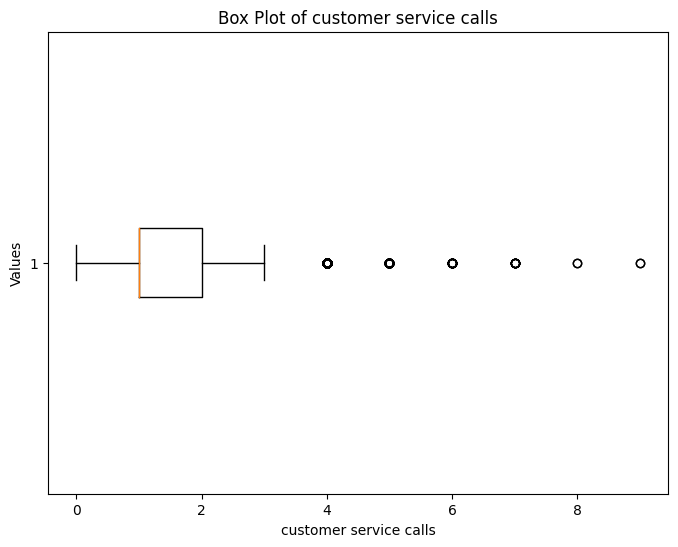

In [ ]:
# # Checking for outliers on the columns "customer service calls" using the box plots
syriaTel_Outliers2 = syriaTel_customer['customer service calls']

# Creating a box plot without outliers
plt.figure(figsize=(8, 6))
plt.boxplot(syriaTel_Outliers2, vert=False)
plt.title('Box Plot of ' + 'customer service calls')
plt.xlabel('customer service calls')
plt.ylabel('Values')
plt.show()


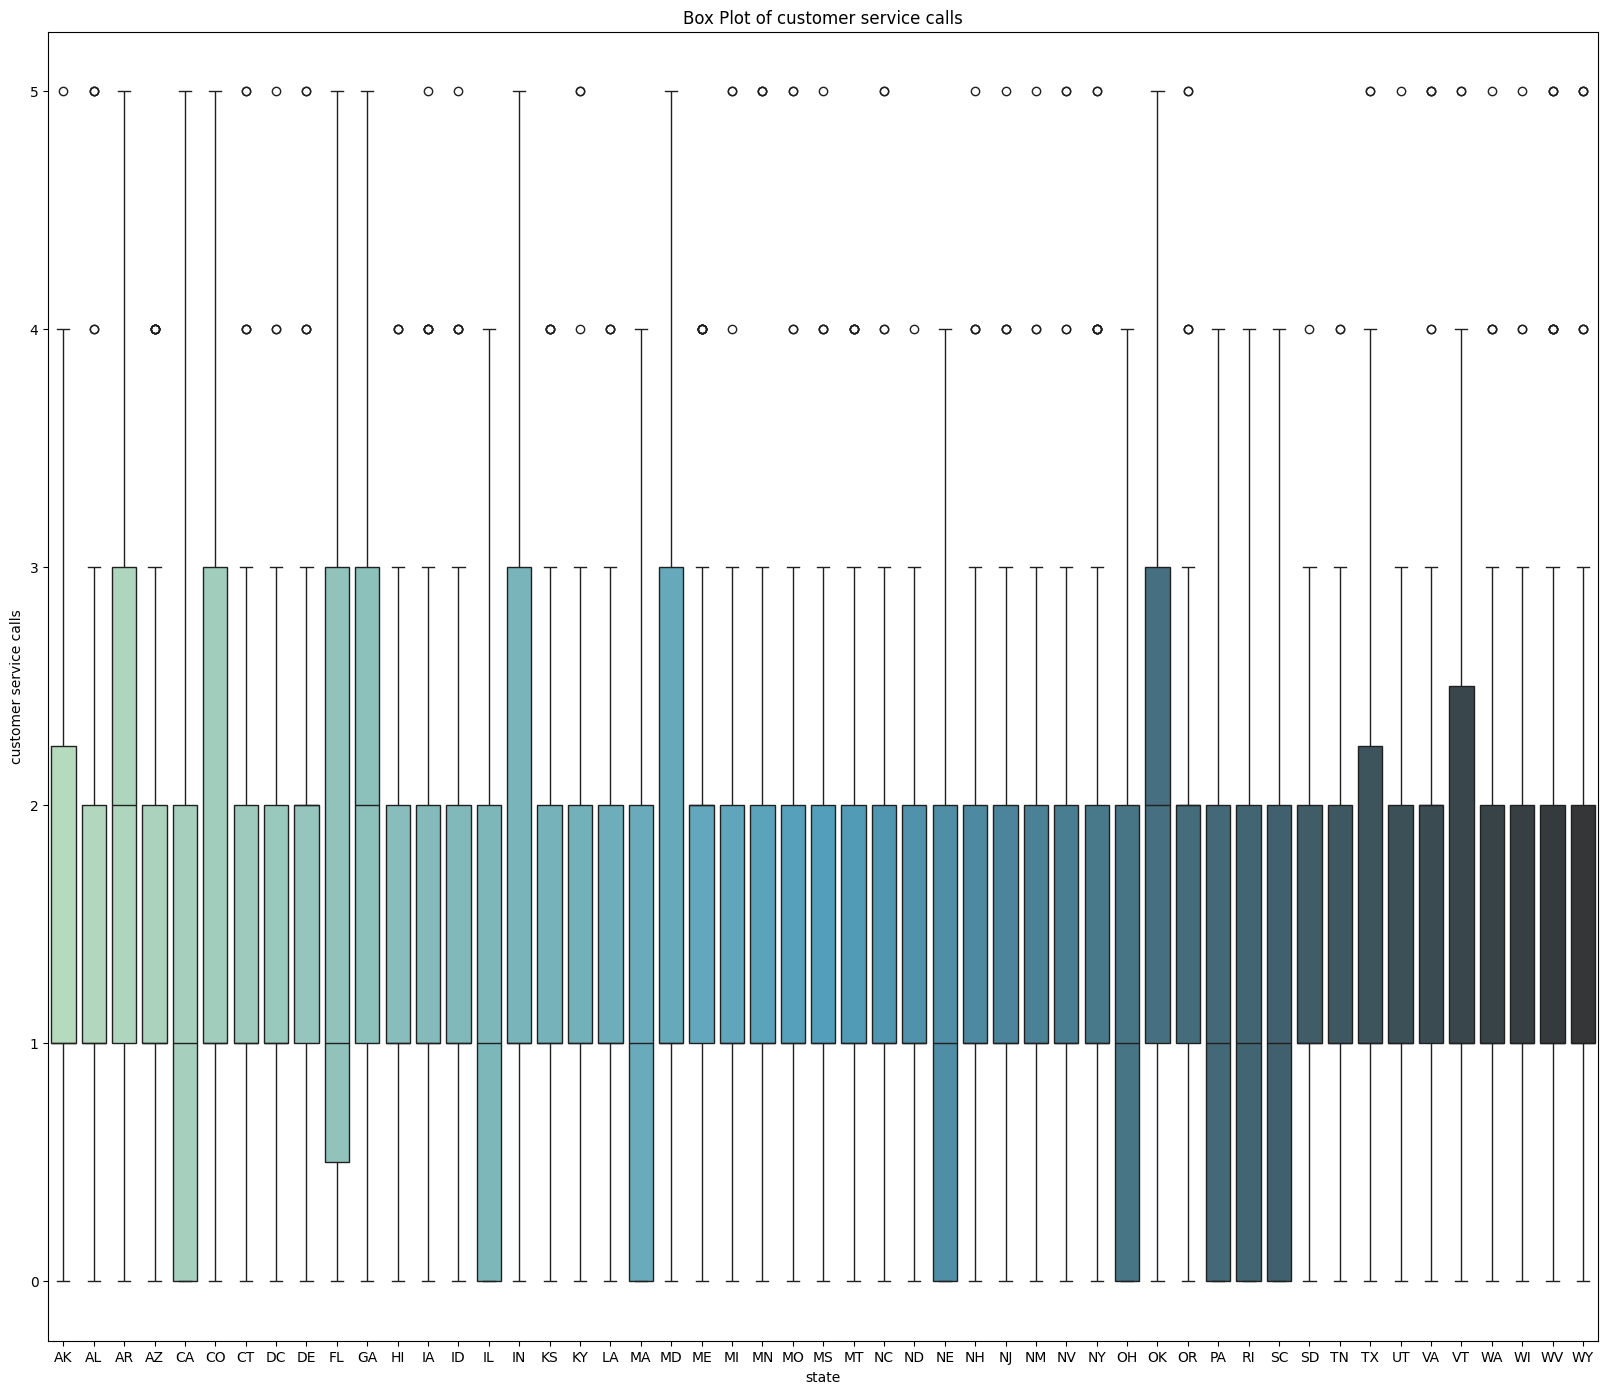

In [ ]:
plt.figure(figsize = (20,17))
sns.boxplot(x='state', y='customer service calls', data=syriaTel_nooutliers2, palette='GnBu_d').set_title('Box Plot of customer service calls')
plt.show()

##Multicollinearity

                  Feature       VIF
0     Subscription Period  5.048991
1  customer service calls  2.224197
2        total day charge  5.341233


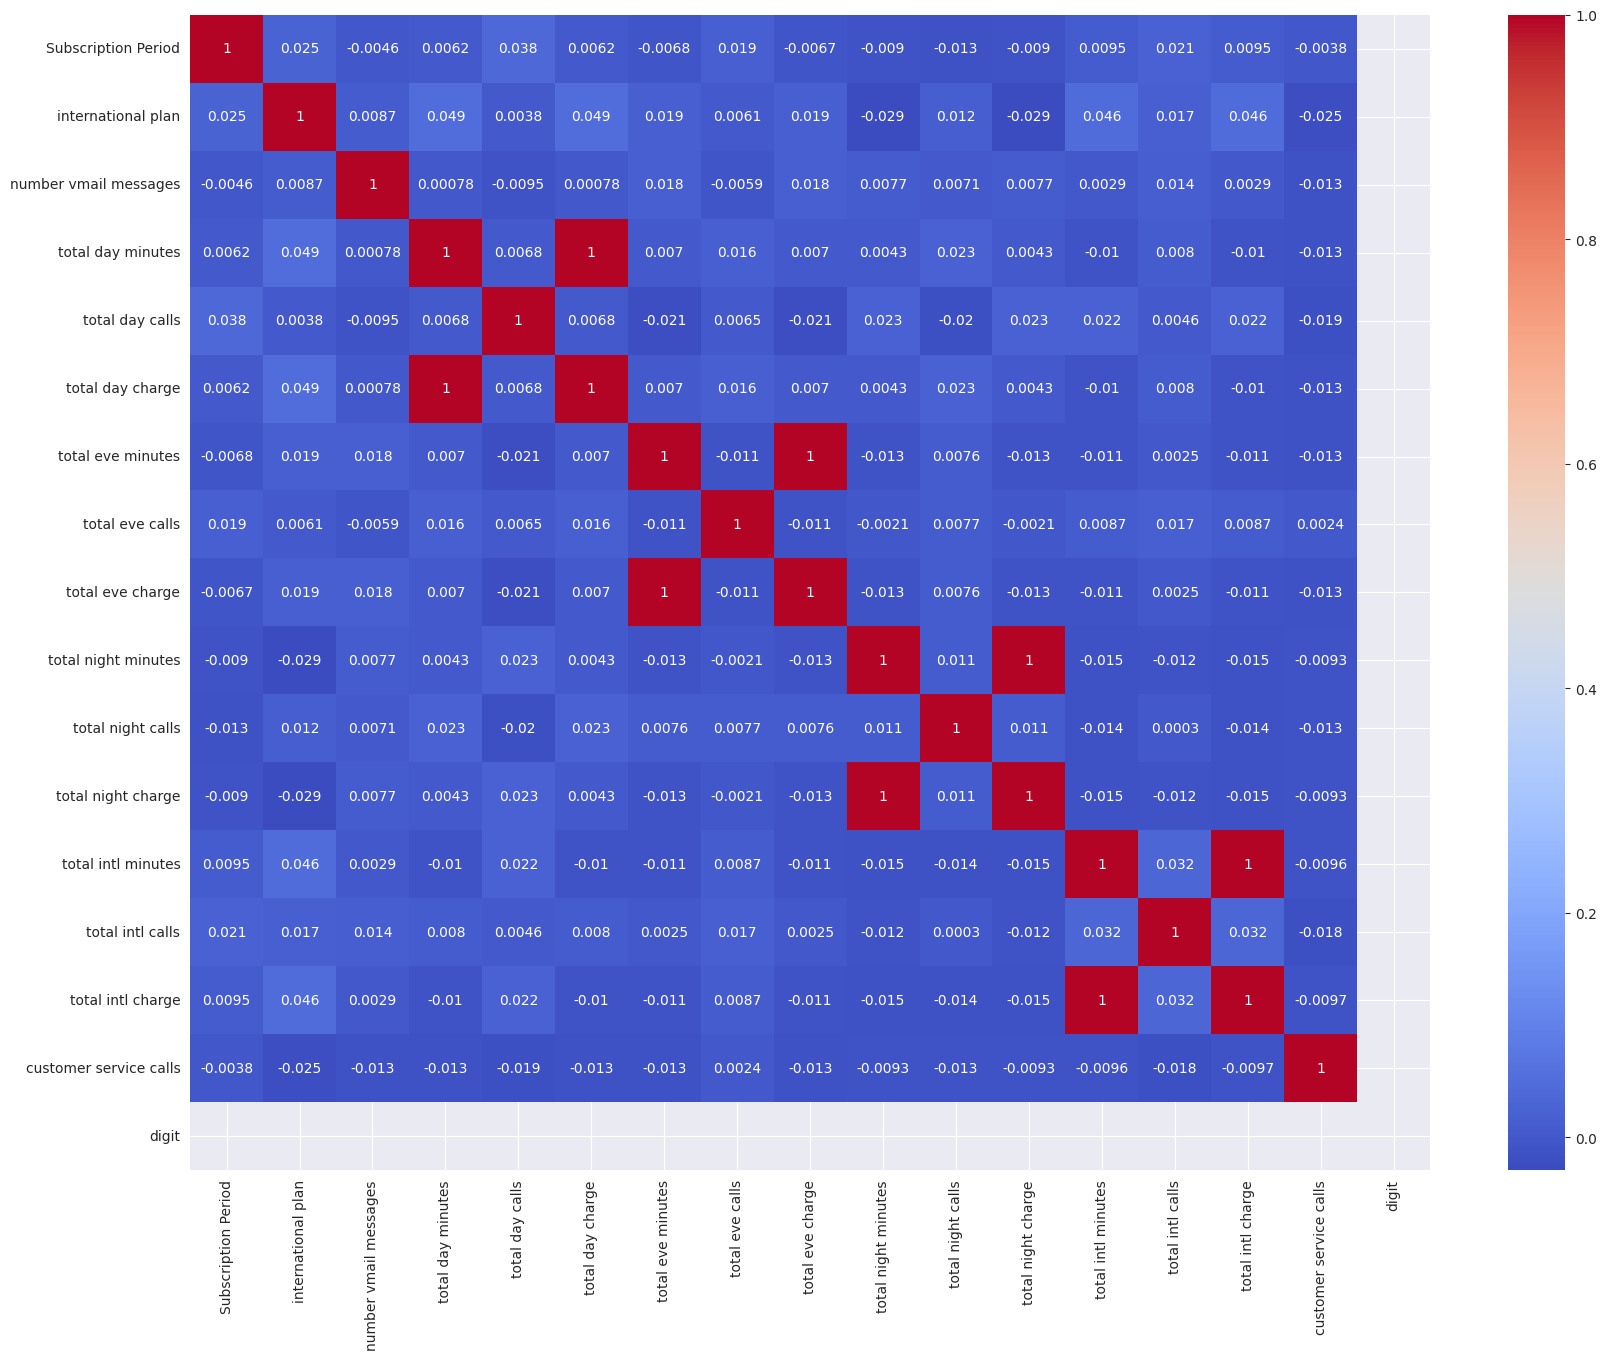

In [ ]:

# Calculate correlation matrix
correlation_matrix = syriaTel_customer.corr()

# Visualize correlation matrix
plt.figure(figsize=(20, 15))
syriaTel_customer = pd.get_dummies(syriaTel_customer, columns=['digit'], drop_first=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Check Variance Inflation Factor (VIF)
X = syriaTel_customer[['Subscription Period', 'customer service calls', 'total day charge']]  # to Specify independent variables
vif_syriaTel_customer = pd.DataFrame()
vif_syriaTel_customer['Feature'] = X.columns
vif_syriaTel_customer['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]


print(vif_syriaTel_customer)


##Creating features

In [ ]:
#Drop area code column
syriaTel_customer.drop(columns=['area code'], inplace=True)

In [ ]:
#To calculate number of customers per state
#syriaTel_state = syriaTel_customer.groupby('state').size()
customer_counts = syriaTel_customer.groupby('state').size()

print("Number of customers per state:")
print(customer_counts)


Number of customers per state:
state
AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
dtype: int64


In [ ]:
# Create a new column 'digit' and assign the value 1 to each row
syriaTel_customer = syriaTel_customer.assign(digit=1)

# Display the DataFrame with the new column
syriaTel_customer


,state,Subscription Period,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,digit
0,KS,128,382-4657,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,OH,107,371-7191,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,NJ,137,358-1921,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1
3,OH,84,375-9999,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1
4,OK,75,330-6626,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,414-4276,0,1,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,0,1
3329,WV,68,370-3271,0,0,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,0,1
3330,RI,28,328-8230,0,0,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,0,1
3331,CT,184,364-6381,1,0,0,213.8,105,36.35,159.6,...,13.57,139.2,137,6.26,5.0,10,1.35,2,0,1


In [ ]:
#Arrange dataframe per state
#Convert the columns datatype from category to integer
# Iterate over columns and convert categorical columns to category codes
columns_to_aggregate = [col for col in syriaTel_customer.columns if col != 'state']

for col in columns_to_aggregate:
    if syriaTel_customer[col].dtype == 'category':
        syriaTel_customer[col] = syriaTel_customer[col].cat.codes.astype(np.int8)

# Get the data type of the 'international plan' column
column_dtype = syriaTel_customer['international plan'].dtype
print("Data type of column 'international plan' after conversion:", column_dtype)


Data type of column 'international plan' after conversion: int8


In [ ]:
# Define the columns for which you want to perform aggregation (all columns except 'state')


for col in columns_to_aggregate:
    if syriaTel_customer[col].dtype == 'bool':
        syriaTel_customer[col] = syriaTel_customer[col].astype(int)

# Group the data by state and sum the values of multiple columns
statewise_data = syriaTel_customer.groupby('state')[columns_to_aggregate].sum().reset_index()
statewise_data

,state,Subscription Period,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,digit
0,AK,5054,22812,4,16,471,9276.0,4954,1576.94,9582.7,...,814.54,10001.0,5062,450.05,521.0,250,140.68,81,3,52
1,AL,7842,34450,8,21,574,14880.8,7928,2529.72,15637.0,...,1329.16,14982.8,7889,674.23,823.4,376,222.32,125,8,80
2,AR,5334,24159,8,14,396,9686.4,5618,1646.70,11057.6,...,939.93,11300.0,5448,508.52,570.5,258,154.04,109,11,55
3,AZ,6430,27690,3,19,606,10982.7,6407,1867.08,12015.9,...,1021.37,12416.3,6399,558.76,680.4,311,183.72,102,4,64
4,CA,3374,15011,4,11,306,6241.2,3553,1061.01,6765.0,...,575.06,6749.3,3373,303.72,335.5,151,90.63,50,9,34
5,CO,6768,28355,4,19,552,11795.0,6278,2005.20,13654.4,...,1160.60,12533.3,6406,564.04,651.5,271,175.94,118,9,66
6,CT,7329,31791,8,21,671,12960.4,7284,2203.30,15083.3,...,1282.12,15243.8,7569,686.01,743.7,304,200.79,112,12,74
7,DC,5709,23547,5,18,526,9254.5,5409,1573.31,10598.7,...,900.94,11142.8,5274,501.43,572.7,211,154.69,73,5,54
8,DE,6217,26839,10,15,425,10649.6,6017,1810.49,12703.1,...,1079.78,12437.9,6174,559.71,627.4,262,169.48,99,9,61
9,FL,6903,27961,8,20,596,11310.6,6363,1922.85,13247.4,...,1126.04,12357.3,6321,556.07,633.0,251,170.93,99,8,63


In [ ]:
statewise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   51 non-null     category
 1   Subscription Period     51 non-null     int64   
 2   area code               51 non-null     int64   
 3   international plan      51 non-null     int8    
 4   voice mail plan         51 non-null     int8    
 5   number vmail messages   51 non-null     int64   
 6   total day minutes       51 non-null     float64 
 7   total day calls         51 non-null     int64   
 8   total day charge        51 non-null     float64 
 9   total eve minutes       51 non-null     float64 
 10  total eve calls         51 non-null     int64   
 11  total eve charge        51 non-null     float64 
 12  total night minutes     51 non-null     float64 
 13  total night calls       51 non-null     int64   
 14  total night charge      51 n

In [ ]:
#Insert columns of customer percentage by state and by churn

# Calculate the total number of customers
total_customers = statewise_data['digit'].sum()
print("total_customers:", total_customers)

# Calculate the percentage of customers for each state
statewise_data['percentage_of_customers'] = (statewise_data['digit'] / total_customers) * 100
# Assuming 'df' is your DataFrame and 'column_to_round' is the name of the column you want to round

# Round the percentage column to a whole number
#statewise_data['percentage_of_customers'] = statewise_data['percentage_of_customers'].round()

statewise_data
# Display the DataFrame with the new column
#print(df)


total_customers: 3333


,state,Subscription Period,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,digit,percentage_of_customers
0,AK,5054,22812,4,16,471,9276.0,4954,1576.94,9582.7,...,10001.0,5062,450.05,521.0,250,140.68,81,3,52,1.560156
1,AL,7842,34450,8,21,574,14880.8,7928,2529.72,15637.0,...,14982.8,7889,674.23,823.4,376,222.32,125,8,80,2.400240
2,AR,5334,24159,8,14,396,9686.4,5618,1646.70,11057.6,...,11300.0,5448,508.52,570.5,258,154.04,109,11,55,1.650165
3,AZ,6430,27690,3,19,606,10982.7,6407,1867.08,12015.9,...,12416.3,6399,558.76,680.4,311,183.72,102,4,64,1.920192
4,CA,3374,15011,4,11,306,6241.2,3553,1061.01,6765.0,...,6749.3,3373,303.72,335.5,151,90.63,50,9,34,1.020102
5,CO,6768,28355,4,19,552,11795.0,6278,2005.20,13654.4,...,12533.3,6406,564.04,651.5,271,175.94,118,9,66,1.980198
6,CT,7329,31791,8,21,671,12960.4,7284,2203.30,15083.3,...,15243.8,7569,686.01,743.7,304,200.79,112,12,74,2.220222
7,DC,5709,23547,5,18,526,9254.5,5409,1573.31,10598.7,...,11142.8,5274,501.43,572.7,211,154.69,73,5,54,1.620162
8,DE,6217,26839,10,15,425,10649.6,6017,1810.49,12703.1,...,12437.9,6174,559.71,627.4,262,169.48,99,9,61,1.830183
9,FL,6903,27961,8,20,596,11310.6,6363,1922.85,13247.4,...,12357.3,6321,556.07,633.0,251,170.93,99,8,63,1.890189


In [ ]:
#Percentage of churns per state
statewise_data['churn_percentage'] = (statewise_data['churn']/total_customers) * 100
statewise_data


,state,Subscription Period,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,digit,percentage_of_customers,churn_percentage
0,AK,5054,22812,4,16,471,9276.0,4954,1576.94,9582.7,...,5062,450.05,521.0,250,140.68,81,3,52,1.560156,0.090009
1,AL,7842,34450,8,21,574,14880.8,7928,2529.72,15637.0,...,7889,674.23,823.4,376,222.32,125,8,80,2.400240,0.240024
2,AR,5334,24159,8,14,396,9686.4,5618,1646.70,11057.6,...,5448,508.52,570.5,258,154.04,109,11,55,1.650165,0.330033
3,AZ,6430,27690,3,19,606,10982.7,6407,1867.08,12015.9,...,6399,558.76,680.4,311,183.72,102,4,64,1.920192,0.120012
4,CA,3374,15011,4,11,306,6241.2,3553,1061.01,6765.0,...,3373,303.72,335.5,151,90.63,50,9,34,1.020102,0.270027
5,CO,6768,28355,4,19,552,11795.0,6278,2005.20,13654.4,...,6406,564.04,651.5,271,175.94,118,9,66,1.980198,0.270027
6,CT,7329,31791,8,21,671,12960.4,7284,2203.30,15083.3,...,7569,686.01,743.7,304,200.79,112,12,74,2.220222,0.360036
7,DC,5709,23547,5,18,526,9254.5,5409,1573.31,10598.7,...,5274,501.43,572.7,211,154.69,73,5,54,1.620162,0.150015
8,DE,6217,26839,10,15,425,10649.6,6017,1810.49,12703.1,...,6174,559.71,627.4,262,169.48,99,9,61,1.830183,0.270027
9,FL,6903,27961,8,20,596,11310.6,6363,1922.85,13247.4,...,6321,556.07,633.0,251,170.93,99,8,63,1.890189,0.240024


##EDA

##Statistical Summary

Interpretation of the summary

In [ ]:
statewise_data.describe()

,Subscription Period,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,digit,percentage_of_customers,churn_percentage
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,6604.882353,28571.156863,6.333333,18.078431,529.294118,11748.831373,6563.764706,1997.336667,13134.656863,6542.764706,...,6542.333333,590.746471,669.037255,292.745098,180.673529,102.137255,9.470588,65.352941,1.960784,0.284146
std,1198.811839,5184.674255,2.854237,4.014191,122.386812,2186.280268,1202.514875,371.673737,2342.630081,1166.372901,...,1221.903379,109.876575,125.140419,56.160072,33.787549,21.317617,4.001764,11.801396,0.354077,0.120065
min,3374.000000,15011.000000,0.000000,10.000000,301.000000,6241.200000,3553.000000,1061.010000,6765.000000,3505.000000,...,3373.000000,303.720000,335.500000,151.000000,90.630000,50.000000,3.000000,34.000000,1.020102,0.090009
25%,5825.500000,25914.000000,4.000000,15.500000,456.000000,10159.900000,5909.000000,1727.240000,11676.250000,5882.500000,...,5877.500000,526.760000,599.050000,256.000000,161.805000,89.500000,6.500000,59.500000,1.785179,0.195020
50%,6604.000000,28355.000000,6.000000,18.000000,522.000000,11615.000000,6475.000000,1974.610000,13392.400000,6485.000000,...,6406.000000,592.920000,646.100000,294.000000,174.490000,104.000000,9.000000,65.000000,1.950195,0.270027
75%,7349.000000,31886.000000,8.000000,20.000000,613.000000,13315.800000,7304.000000,2263.735000,14383.200000,7217.000000,...,7292.000000,654.030000,759.650000,327.000000,205.130000,115.000000,12.500000,72.500000,2.175218,0.375038
max,10116.000000,47080.000000,15.000000,29.000000,925.000000,18438.800000,11001.000000,3134.670000,19971.800000,10394.000000,...,10660.000000,959.060000,1067.200000,468.000000,288.190000,159.000000,18.000000,106.000000,3.180318,0.540054


In [ ]:
syriaTel_customer.describe()

,Subscription Period,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,digit
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.0
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,1.0
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,0.0
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,1.0
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,1.0
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,1.0
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.0


##Target Variable

####Univariate Analysis

**'Churn'** is our target as that is the dependent variable we are trying to predict.

<Figure size 2000x1500 with 0 Axes>

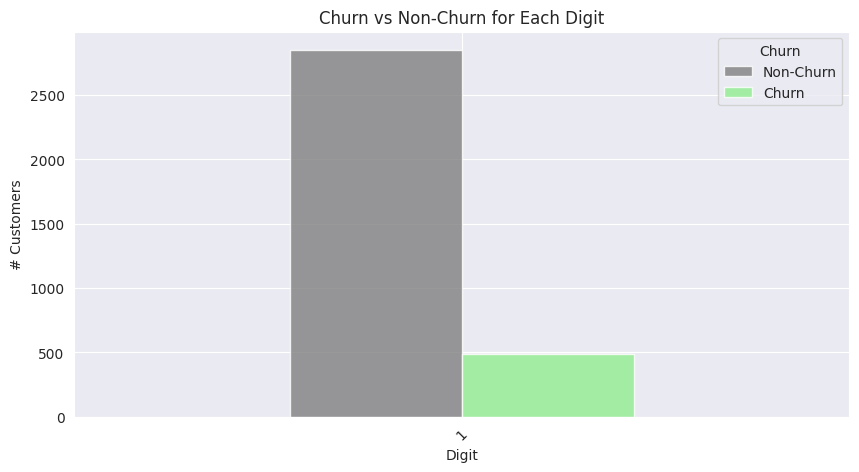

In [ ]:
# Group by 'digit' and 'churn' and count occurrences
#grouped_data = syriaTel_customer.groupby(['digit', 'churn']).size().unstack()

plt.figure(figsize=(20, 15))
grouped_data.plot(kind='bar', alpha=0.8, color=['grey', 'lightgreen'], width=0.4)
plt.title('Churn vs Non-Churn for Each Digit')
plt.xlabel('Digit')
plt.ylabel('# Customers')
plt.legend(title='Churn', labels=['Non-Churn', 'Churn'], loc='upper right')
plt.xticks(rotation=45)
plt.show()


# Calculate percentages
#total_counts = grouped_data.sum(axis=1)
#churn_percentages = (grouped_data['Churn'] / total_counts) * 100
#non_churn_percentages = (grouped_data['Non-Churn'] / total_counts) * 100

# Plot the bar graph
#plt.figure(figsize=(20, 15))
#bar_width = 0.35
#bar_positions = np.arange(len(grouped_data))
#plt.bar(bar_positions - bar_width/2, churn_percentages, bar_width, alpha=0.8, color='lightgreen', label='Churn')
#plt.bar(bar_positions + bar_width/2, non_churn_percentages, bar_width, alpha=0.8, color='grey', label='Non-Churn')
#plt.title('Percentage of Churn and Non-Churn for Each Digit')
#plt.xlabel('Digit')
#plt.ylabel('Percentage of Customers')
#plt.xticks(bar_positions, grouped_data.index, rotation=45)
#plt.legend()
#plt.show()


Target variable insights :

##Numeric Features
- Subscription Period
- Number of voice Mail messages
- Total day Minutes
- Total day Calls
- Total day Charge
- Total evening minutes
- Total evening calls
- Total evening charge
- Total Night minutes
- Total Night calls
- Total night charge
- Total International calls
- Total International minutes
- Total International Charge
- Customer Service calls




##Categorical features

- International Plan
- Voice Mail Plan

In [ ]:
# numeric features
#A summary of some of the numeric features and categorical features
print('Continuous Variables')
print(syriaTel_customer[['Subscription Period','customer service calls','total day calls','total eve calls','total night calls','total day charge','total night charge','total eve charge']].describe().transpose())
print('--'*40)
print('Discrete Variables')
#print(syriaTel_customer.groupby('international plan').international plan.count())
print(syriaTel_customer.groupby('international plan')['international plan'].count())
print(syriaTel_customer.groupby('voice mail plan')['voice mail plan'].count())



Continuous Variables
                         count        mean        std    min    25%     50%  \
Subscription Period     3333.0  101.064806  39.822106   1.00  74.00  101.00   
customer service calls  3333.0    1.562856   1.315491   0.00   1.00    1.00   
total day calls         3333.0  100.435644  20.069084   0.00  87.00  101.00   
total eve calls         3333.0  100.114311  19.922625   0.00  87.00  100.00   
total night calls       3333.0  100.107711  19.568609  33.00  87.00  100.00   
total day charge        3333.0   30.562307   9.259435   0.00  24.43   30.50   
total night charge      3333.0    9.039325   2.275873   1.04   7.52    9.05   
total eve charge        3333.0   17.083540   4.310668   0.00  14.16   17.12   

                           75%     max  
Subscription Period     127.00  243.00  
customer service calls    2.00    9.00  
total day calls         114.00  165.00  
total eve calls         114.00  170.00  
total night calls       113.00  175.00  
total day charge     

Text(0.5, 1.0, 'International plan')

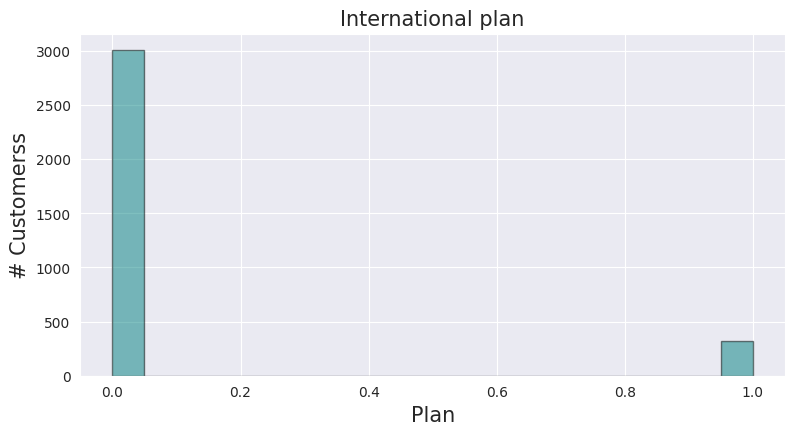

In [ ]:
#A visualization of some of the categorical variables
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax2 = fig.add_subplot(323)
ax2.hist(syriaTel_customer['international plan'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Plan',fontsize = 15)
ax2.set_ylabel('# Customerss',fontsize = 15)
ax2.set_title('International plan',fontsize = 15)

Text(0.5, 1.0, 'voice mail plan')

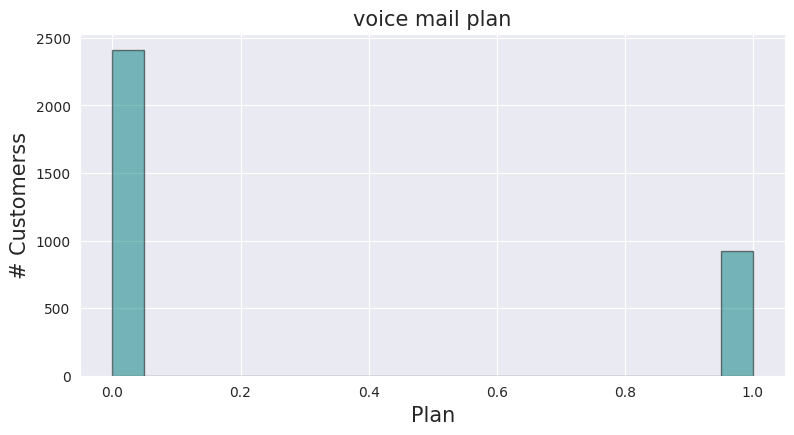

In [ ]:
#A visualization of some of the disc
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax2 = fig.add_subplot(323)
ax2.hist(syriaTel_customer['voice mail plan'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Plan',fontsize = 15)
ax2.set_ylabel('# Customerss',fontsize = 15)
ax2.set_title('voice mail plan',fontsize = 15)

Target Vs Categorical features

In [ ]:


#print(syriaTel_customer['churn'].dtype)




voicemail_customers = syriaTel_customer[syriaTel_customer['voice mail plan'] == 'Yes']
num_voicemail_customers = len(voicemail_customers)
print("Number of customers with a voicemail plan:", num_voicemail_customers)



Number of customers with a voicemail plan: 0


Number of customers with a voice mail plan who churned: 0


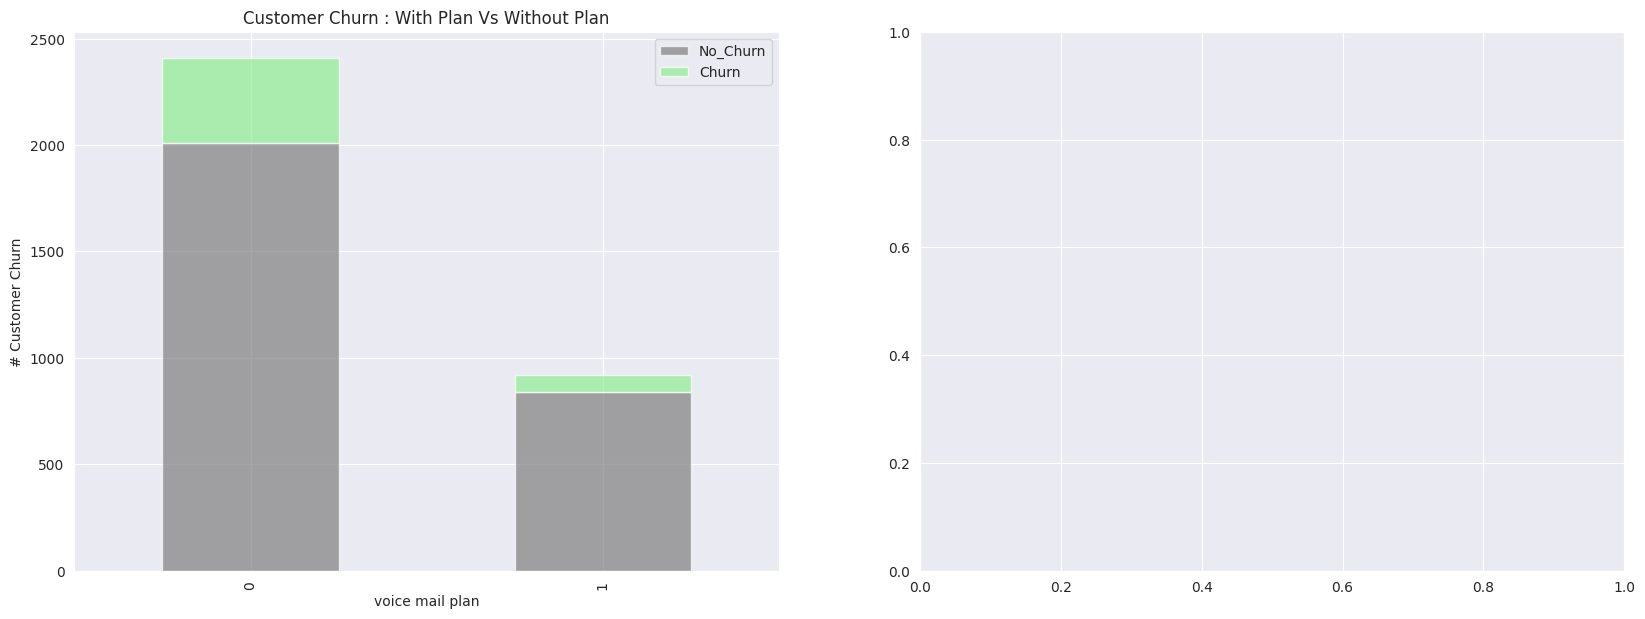

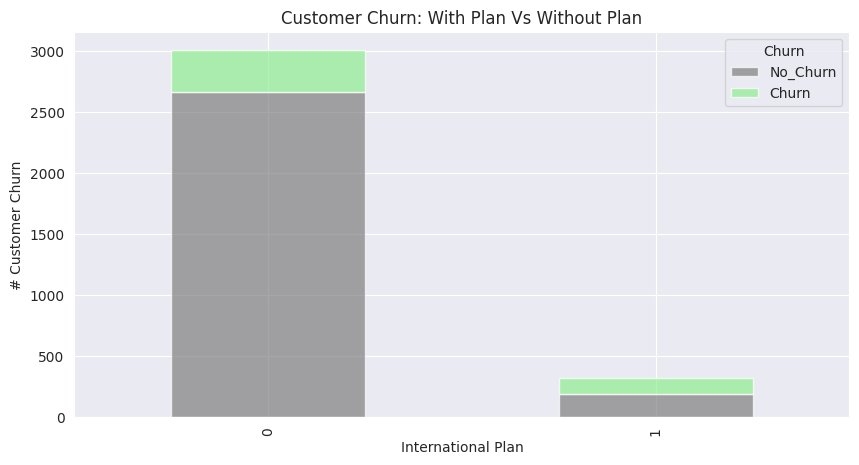

In [ ]:
# Sublots of categorical features v Churn

#Convert 'voicemail' column to categorical data
syriaTel_customer['voice mail plan'] = syriaTel_customer['voice mail plan'].astype('category')

#Convert 'churn' column to categorical data
syriaTel_customer['churn'] = syriaTel_customer['churn'].astype('category')

#get the count of customers with voice mail and churned
voicemail_churned_customers = syriaTel_customer[(syriaTel_customer['voice mail plan'] == 'Yes') & (syriaTel_customer['churn'] == 'True')]
num_voicemail_churned_customers = len(voicemail_churned_customers)
print("Number of customers with a voice mail plan who churned:", num_voicemail_churned_customers)


sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (20,7))

Voicemail_Plan = syriaTel_customer.groupby(['voice mail plan', 'churn'])['voice mail plan'].count().unstack()
p1 = Voicemail_Plan.plot(kind='bar', stacked=True,
                          title='Customer Churn : With Plan Vs Without Plan',
                          color=['grey', 'lightgreen'], alpha=0.7, ax=axes[0])
p1.set_xlabel('voice mail plan')
p1.set_ylabel('# Customer Churn')
p1.legend(['No_Churn', 'Churn'])


International_Plan = syriaTel_customer.groupby(['international plan', 'churn'])['international plan'].count().unstack()
p1 = International_Plan.plot(kind='bar', stacked=True,
                              title='Customer Churn: With Plan Vs Without Plan',
                              color=['grey', 'lightgreen'], alpha=0.7)
p1.set_xlabel('International Plan')
p1.set_ylabel('# Customer Churn')
p1.legend(['No_Churn', 'Churn'], title='Churn')



plt.show()




In [ ]:
#Correlation between customer calls and churn

correlation = syriaTel_customer['customer service calls'].corr(syriaTel_customer['churn'])

print("Correlation between customer service calls and churn:", correlation)


Correlation between customer service calls and churn: 0.20874999878379402
